In [98]:
train <- read.csv('wage_train.csv')
test <- read.csv('wage_test.csv')

In [99]:
str(train)

'data.frame':	30162 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : int  5 4 2 2 2 2 2 4 2 2 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : int  9 9 11 1 9 12 6 11 12 9 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: int  4 2 0 2 2 2 3 2 4 2 ...
 $ occupation    : int  0 3 5 5 9 3 7 3 9 3 ...
 $ relationship  : int  1 0 1 0 5 5 1 0 1 0 ...
 $ race          : int  4 4 4 2 2 4 2 4 4 4 ...
 $ sex           : int  1 1 1 1 0 0 0 1 0 1 ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native_country: int  38 38 38 38 4 38 22 38 38 38 ...
 $ wage_class    : int  0 0 0 0 0 0 0 1 1 1 ...


In [100]:
str(test)

'data.frame':	15060 obs. of  15 variables:
 $ age           : int  25 38 28 44 34 63 24 55 65 36 ...
 $ workclass     : int  2 2 1 2 2 4 2 2 2 0 ...
 $ fnlwgt        : int  226802 89814 336951 160323 198693 104626 369667 104996 184454 212465 ...
 $ education     : int  1 11 7 15 0 14 15 5 11 9 ...
 $ education_num : int  7 9 12 10 6 15 10 4 9 13 ...
 $ marital_status: int  4 2 2 2 4 2 4 2 2 2 ...
 $ occupation    : int  6 4 10 6 7 9 7 2 6 0 ...
 $ relationship  : int  3 0 0 0 1 0 4 0 0 0 ...
 $ race          : int  2 4 4 2 4 4 4 4 4 4 ...
 $ sex           : int  1 1 1 1 1 1 0 1 1 1 ...
 $ capital_gain  : int  0 0 0 7688 0 3103 0 0 6418 0 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 50 40 40 30 32 40 10 40 40 ...
 $ native_country: int  38 38 38 38 38 38 38 38 38 38 ...
 $ wage_class    : int  0 0 1 1 0 1 0 0 1 0 ...


### RF

In [6]:
library(randomForest)
library(caret)


Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [3]:
set.seed(10)
rf.model <- randomForest(as.factor(wage_class) ~ ., data = train,
                         ntree = 100, nodesize = 20)

In [4]:
rf.predict <- predict(rf.model, test)

In [7]:
confusionMatrix(test$wage_class, rf.predict)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10639   721
         1  1404  2296
                                          
               Accuracy : 0.8589          
                 95% CI : (0.8532, 0.8644)
    No Information Rate : 0.7997          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.594           
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8834          
            Specificity : 0.7610          
         Pos Pred Value : 0.9365          
         Neg Pred Value : 0.6205          
             Prevalence : 0.7997          
         Detection Rate : 0.7064          
   Detection Prevalence : 0.7543          
      Balanced Accuracy : 0.8222          
                                          
       'Positive' Class : 0               
                                          

### Logistic regression

In [8]:
glm.model <- glm(as.factor(wage_class) ~ ., data = train, family = "binomial")
glm.predict <- predict(glm.model, test, type = "response")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [10]:
confusionMatrix(test$wage_class, as.integer(as.logical(glm.predict > 0.5)),positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10657   703
         1  2006  1694
                                          
               Accuracy : 0.8201          
                 95% CI : (0.8139, 0.8262)
    No Information Rate : 0.8408          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4493          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7067          
            Specificity : 0.8416          
         Pos Pred Value : 0.4578          
         Neg Pred Value : 0.9381          
             Prevalence : 0.1592          
         Detection Rate : 0.1125          
   Detection Prevalence : 0.2457          
      Balanced Accuracy : 0.7742          
                                          
       'Positive' Class : 1               
                                          

### Decision Tree

In [11]:
library(rpart)
library(rpart.plot)

In [13]:
tree.model <- rpart(as.factor(wage_class) ~ ., data = train, method = "class", minbucket = 20)


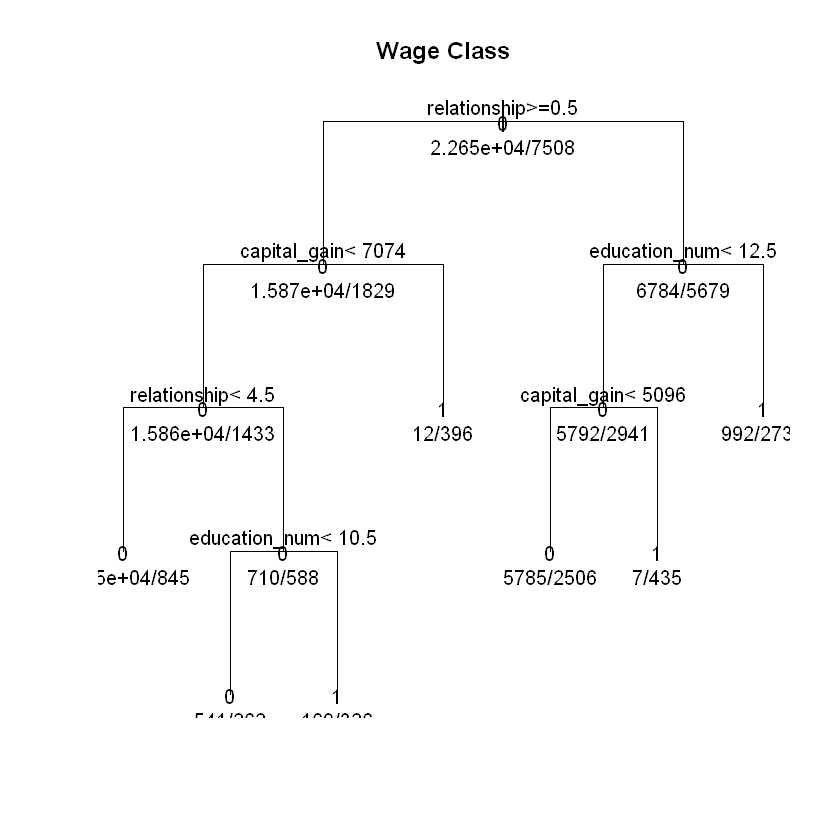

In [14]:
plot(tree.model, uniform=TRUE, main="Wage Class")
text(tree.model, use.n=TRUE, all=TRUE)

In [15]:
tree.predict <- predict(tree.model, test, type = "class")
confusionMatrix(test$wage_class, tree.predict)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10745   615
         1  1810  1890
                                         
               Accuracy : 0.839          
                 95% CI : (0.833, 0.8448)
    No Information Rate : 0.8337         
    P-Value [Acc > NIR] : 0.04052        
                                         
                  Kappa : 0.5125         
 Mcnemar's Test P-Value : < 2e-16        
                                         
            Sensitivity : 0.8558         
            Specificity : 0.7545         
         Pos Pred Value : 0.9459         
         Neg Pred Value : 0.5108         
             Prevalence : 0.8337         
         Detection Rate : 0.7135         
   Detection Prevalence : 0.7543         
      Balanced Accuracy : 0.8052         
                                         
       'Positive' Class : 0              
                                         

### GBM

In [ ]:
#install.packages('gbm',repos = 'http://cran.us.r-project.org')

In [17]:
library(gbm)

Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


In [33]:
gbmModel = gbm(formula = wage_class ~ .,
               distribution = "bernoulli",
               data = train,
               n.trees = 100,
               shrinkage = .01,
               n.minobsinnode = 20)

In [31]:
gbm.predict = predict(object = gbmModel,
                              newdata = test,
                              n.trees = 100,
                              type = "response")


In [32]:
confusionMatrix(test$wage_class, as.integer(as.logical(gbm.predict > 0.5)))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11357     3
         1  3251   449
                                          
               Accuracy : 0.7839          
                 95% CI : (0.7773, 0.7905)
    No Information Rate : 0.97            
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.172           
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7775          
            Specificity : 0.9934          
         Pos Pred Value : 0.9997          
         Neg Pred Value : 0.1214          
             Prevalence : 0.9700          
         Detection Rate : 0.7541          
   Detection Prevalence : 0.7543          
      Balanced Accuracy : 0.8854          
                                          
       'Positive' Class : 0               
                                          

### Xgboost

In [111]:
require(xgboost)
require(data.table)
require(Matrix)

Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [112]:
sparse_matrix <- sparse.model.matrix(wage_class~.-1, data = train)

In [113]:
head(sparse_matrix)

   [[ suppressing 14 column names 'age', 'workclass', 'fnlwgt' ... ]]


6 x 14 sparse Matrix of class "dgCMatrix"
                                          
1 39 5  77516  9 13 4 . 1 4 1 2174 . 40 38
2 50 4  83311  9 13 2 3 . 4 1    . . 13 38
3 38 2 215646 11  9 . 5 1 4 1    . . 40 38
4 53 2 234721  1  7 2 5 . 2 1    . . 40 38
5 28 2 338409  9 13 2 9 5 2 .    . . 40  4
6 37 2 284582 12 14 2 3 5 4 .    . . 40 38

In [119]:
bst <- xgboost(data = sparse_matrix, label = train$wage_class, max.depth = 4,
               eta = 1, nthread = 2, nround = 10,objective = "binary:logistic")

[1]	train-error:0.158478 
[2]	train-error:0.152211 
[3]	train-error:0.147769 
[4]	train-error:0.142994 
[5]	train-error:0.138585 
[6]	train-error:0.136662 
[7]	train-error:0.136264 
[8]	train-error:0.134839 
[9]	train-error:0.132717 
[10]	train-error:0.132087 


In [120]:
sparse_test <- sparse.model.matrix(wage_class~.-1, data = test)

In [121]:
# predict values in test set
y_pred <- predict(bst, sparse_test)

In [122]:
length(y_pred)

[1] 15060

In [123]:
confusionMatrix(test$wage_class, as.integer(as.logical(y_pred > 0.5)))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 10650   710
         1  1363  2337
                                          
               Accuracy : 0.8624          
                 95% CI : (0.8567, 0.8678)
    No Information Rate : 0.7977          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6051          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8865          
            Specificity : 0.7670          
         Pos Pred Value : 0.9375          
         Neg Pred Value : 0.6316          
             Prevalence : 0.7977          
         Detection Rate : 0.7072          
   Detection Prevalence : 0.7543          
      Balanced Accuracy : 0.8268          
                                          
       'Positive' Class : 0               
                                          

In [124]:
importance <- xgb.importance(feature_names = sparse_matrix@Dimnames[[2]], model = bst)
head(importance)

Feature,Gain,Cover,Frequency
relationship,0.33655399,0.06468604,0.05925926
capital_gain,0.20059916,0.21030937,0.15555556
education_num,0.19250670,0.13851639,0.11851852
age,0.08014330,0.09223470,0.10370370
capital_loss,0.05508677,0.16669376,0.13333333
hours_per_week,0.04161977,0.07419463,0.08148148
